# Reading and Writing Spatial Data





<br></br>
<font size="4">In this notebook, you will learn how to read and write spatial data (like ESRI's shapefiles) in python using `geopandas` library.</font>





## Reading Spatial Data 




<br></br>
<font size="4">geopandas can read almost any vector-based spatial data format including ESRI shapefile, GeoJSON files and more using the command:</font>


<br></br>
`geopandas.read_file()`



In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
states = gpd.read_file("/Users/Ziqi/Desktop/GIS 322 Fall 19/Data/US_states/tl_2018_us_state.shp")


<br></br>
<font size="4">The file read in is called a `GeoDataFrame`</font>

In [4]:
states.__class__

geopandas.geodataframe.GeoDataFrame


<br></br>
<font size="4">Note that last column `geometry` in the GeoDataFrame `states` contains shapes. Other columns contain the attributes of each ploygon, in our example of each state.</font>

In [5]:
states.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266474513,489028543,+38.6472854,-080.6183274,"POLYGON ((-81.747254 39.095379, -81.746354 39...."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138949136250,31361101223,+28.4574302,-082.4091477,"(POLYGON ((-86.38864599999999 30.994181, -86.3..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143780567633,6214824948,+40.1028754,-089.1526108,"POLYGON ((-91.185295 40.637803, -91.1751 40.64..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206228939448,18945217189,+46.3159573,-094.1996043,"POLYGON ((-96.784381 46.63050399999999, -96.78..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151100280,6979966958,+38.9466584,-076.6744939,"POLYGON ((-77.45880799999999 39.22027, -77.458..."


## Plotting Spatial Data 


<br></br>

<font size="4">After your spatial data are readed in, you can use this command to do a simple plot:</font>

<br></br>
`GeoDataFrame.plot()`

<br></br>
<font size="4">where in the below example, there are several added argument in the `GeoDataFrame.plot()`</font>


* ```figsize=(10,5)``` is to set the size of the figure
* ```color='white'``` is to set the fill color of the polygon
* ```edgecolor='black'``` is to set the edge color of the polygon

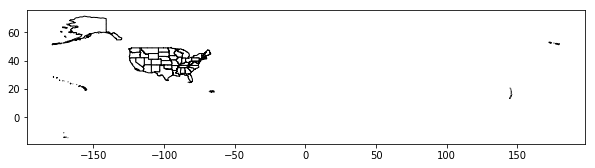

In [6]:
states.plot(figsize=(10,5),color='white', edgecolor='black')


<br></br>
<font size="4">A `geopandas`'s `GeoDataFrame` is a subclass of `pandas`'s `DataFrame`, which means that all the methods in `pandas.DataFrame` apply to `geopandas.GeoDataFrame`.</font>

<br></br>
<font size="4">For example, let's subset our `states` and get Arizona!</font>
 
 

In [7]:
AZ = states[states.NAME == "Arizona"]
AZ

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
55,4,8,04,01779777,04,AZ,Arizona,00,G4000,A,294198551143,1027337603,+34.2039355,-111.6063565,"POLYGON ((-114.516454 33.027617, -114.516639 3..."


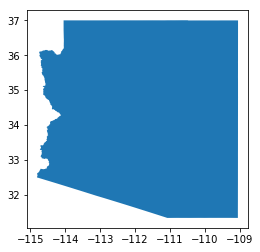

In [8]:
AZ.plot()


<br></br>
<font size="4">You can change the fill color of the polygon by using `.plot(,color="orange")`.</font>

Text(0.5, 0.98, 'Arizona')

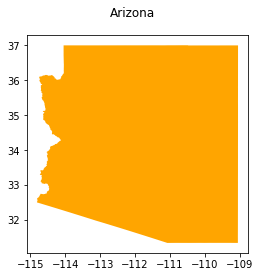

In [9]:
fig, ax = plt.subplots(1, 1)
AZ.plot(ax=ax, color="orange")
fig.suptitle("Arizona")


<br></br>
<font size="4">Now, let's add our capital ono the map. We will be creating a `shapely.geometry.Point` class, and use Phoenix's longitude and latitude to initalize the `Point` class, like this</font>

In [10]:
from shapely.geometry import Point
PHX_coor = Point(-112.0740, 33.4484)
phx = gpd.GeoSeries(PHX_coor)

Text(0.5, 0.98, 'Arizona')

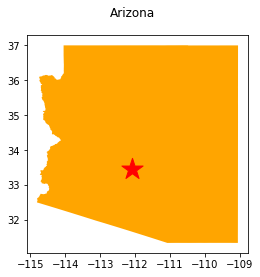

In [11]:
fig, ax = plt.subplots(1, 1)
AZ.plot(ax=ax, color="orange")
phx.plot(ax=ax,marker="*",markersize=500,color="red")
fig.suptitle("Arizona")

<br></br>
<font size="4">Lets do a bit more of exploration. In the example given below, I excluded the states that are nont in the lower 48.</font>

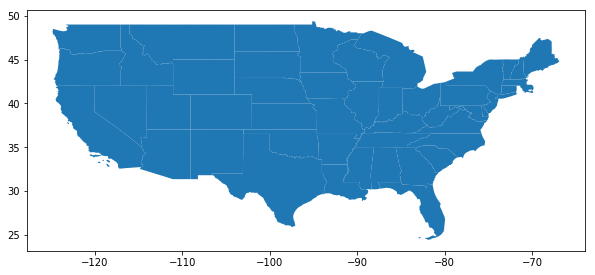

In [12]:
contig = states[~states.NAME.isin(["Alaska", "Rhode Island", 
                                   "Hawaii", "Puerto Rico", "United States Virgin Islands", 
                                  "Commonwealth of the Northern Mariana Islands","Guam",
                                   "American Samoa"
                                  ])]
contig.plot(figsize=(10,10))

## Writing Spatial Data 

<br></br>
<font size="4">Writing the GeoDataFrame to file is straightfoward by following this command:</font>

`GeoDataFrame.to_file`

In [13]:
contig.to_file("../Data/US_contig/contig.shp")

<font size="4">Let's check if our writing is right by re-read the file, and plot it</font>

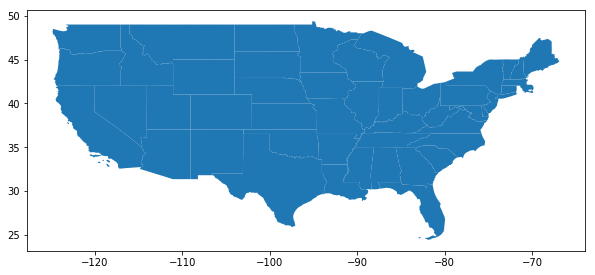

In [14]:
contig_check = gpd.read_file("../Data/US_contig/contig.shp")
contig_check.plot(figsize=(10,10))